In [1]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
from sympy import init_printing
init_printing()

In [3]:
x = sympy.symbols('x')

In [4]:
x

In [7]:
3*x

In [8]:
nu = sympy.symbols('nu')

In [9]:
nu

In [10]:
x, nu, t = sympy.symbols('x nu t')
phi = sympy.exp(-(x-4*t)**2/(4*nu*(t+1)))+sympy.exp(-(x-4*t-2*numpy.pi)**2/(4*nu*(t+1)))

In [11]:
phi

In [12]:
phidao = phi.diff(x)

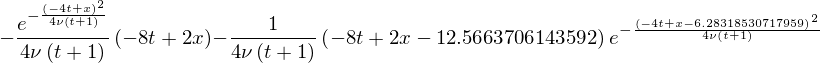

In [13]:
phidao

In [14]:
print (phidao)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


In [15]:
from sympy.utilities.lambdify import lambdify
u = -2*nu*(phidao/phi)+4

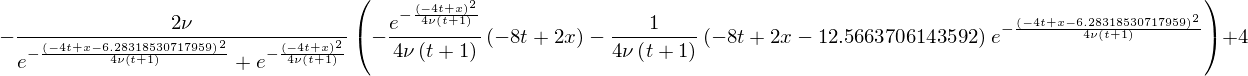

In [16]:
u

In [17]:
u_lamb = lambdify((t, x, nu), u)

In [18]:
format(u_lamb(1, 4, 3))

'3.4917066420644494'

In [19]:
nx = 101
nt = 100
dx = 2*numpy.pi/(nx-1)
nu = 0.07
sigma = 0.1
dt = sigma*dx**2/nu

x = numpy.linspace(0, 2*numpy.pi, nx)
un = numpy.empty(nx)
t = 0

In [20]:
u = numpy.asarray([u_lamb(t, x0, nu) for x0 in x])

In [21]:
u

array([ 4.        ,  4.06283185,  4.12566371,  4.18849556,  4.25132741,
        4.31415927,  4.37699112,  4.43982297,  4.50265482,  4.56548668,
        4.62831853,  4.69115038,  4.75398224,  4.81681409,  4.87964594,
        4.9424778 ,  5.00530965,  5.0681415 ,  5.13097336,  5.19380521,
        5.25663706,  5.31946891,  5.38230077,  5.44513262,  5.50796447,
        5.57079633,  5.63362818,  5.69646003,  5.75929189,  5.82212374,
        5.88495559,  5.94778745,  6.0106193 ,  6.07345115,  6.136283  ,
        6.19911486,  6.26194671,  6.32477856,  6.38761042,  6.45044227,
        6.51327412,  6.57610598,  6.63893783,  6.70176967,  6.76460125,
        6.82742866,  6.89018589,  6.95176632,  6.99367964,  6.72527549,
        4.        ,  1.27472451,  1.00632036,  1.04823368,  1.10981411,
        1.17257134,  1.23539875,  1.29823033,  1.36106217,  1.42389402,
        1.48672588,  1.54955773,  1.61238958,  1.67522144,  1.73805329,
        1.80088514,  1.863717  ,  1.92654885,  1.9893807 ,  2.05

In [22]:
for n in range(nt):
    un = u.copy()
    u[1:-1] = un[1:-1] - un[1:-1] *dt/dx * (un[1:-1]-un[0:-2]) +nu*dt/dx**2\
                *(un[2:] - 2*un[1:-1] + un[0: -2])
    u[0] = un[0] - un[0] * dt/dx *(un[0]-un[-1]) + nu*dt/dx**2\
             * (un[1]- 2*un[0] +un[-1])
    u[-1] = un[-1] - un[-1]*dt/dx *(un[-1]-un[-2]) +nu*dt/dx**2 *\
              (un[0]-2*un[-1]+un[-2])
        
u_ananalytical = numpy.asarray([u_lamb(nt*dt, xi, nu)for xi in x])

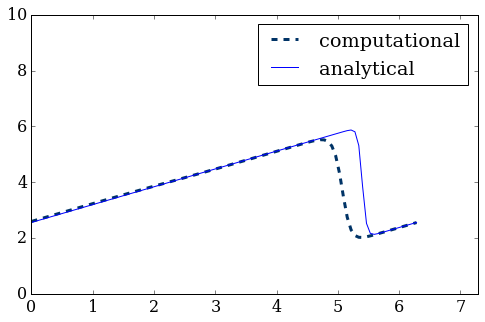

In [25]:
pyplot.figure(figsize=(8, 5), dpi = 100)
pyplot.plot(x, u, color='#003366', ls='--', lw=3 , label='computational')
pyplot.plot(x, u_ananalytical, label='analytical')
pyplot.xlim(0, 2*numpy.pi+1)
pyplot.ylim(0, 10)
pyplot.legend();

In [26]:
from JSAnimation.IPython_display import display_animation


ImportError: No module named 'JSAnimation'